In [1]:
# import lsst.summit.extras

In [1]:
# lsst.summit.__file__

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from MYpsfPlotting import makeAzElPlot, makeTableFromSourceCatalogs, makeFocalPlanePlot, makeEquatorialPlot, MakeGridMedianPSF
from lsst.obs.lsst import LsstComCam, LsstCam
import matplotlib.pyplot as plt
from ellipticity_util import addFieldCoords_to_Table, makeOCSPlot, read_batoid_table, addOpticalCoords_to_Table
from lsst.ts.aos.analysis import StateFetcher #source .user_setups
from lsst.daf.butler import Butler
import numpy as np

## set up

In [3]:
# #LSSTCam
# camera = LsstCam().getCamera()
# n_det = 189 # LSSTCam
#ComCam
camera = LsstComCam().getCamera()
n_det = 9 # ComCam

In [4]:
butler = Butler(
    "embargo", 
    collections=["LSSTComCam/nightlyValidation"], 
    instrument="LSSTComCam"
)
camera = LsstComCam().getCamera()

In [5]:
dayObs = 20241127
seqNum = 280
visit_id = int(f"{dayObs}{seqNum:05d}")

## Lettura icSrc

In [6]:
#puoi usarla su icSrc o su src
icSrcs={}
for i in range(n_det):
    icSrcs[i] = butler.get("icSrc", dataId={"visit":visit_id, "detector":i})
visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":8})
table = makeTableFromSourceCatalogs(icSrcs, visitInfo)

In [7]:
table = addOpticalCoords_to_Table( table )
table = addFieldCoords_to_Table( table, camera )

In [8]:
table_grid = MakeGridMedianPSF(table, 12, 12, 3)

In [9]:
table_grid

oc_grid_id,oc_grid_x,oc_grid_y,oc_grid_x_median,oc_grid_y_median,n_stars_in_cells,oc_grid_Ixx,oc_grid_Ixy,oc_grid_Iyy,oc_grid_T,oc_grid_e1,oc_grid_e2,oc_grid_e
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
0,-0.32620561476507337,-0.3227161642895406,-0.32034643455286416,-0.3158855774209618,14,0.22003125129324314,0.01150197586852424,0.22465320702880587,0.444684458322049,-0.010393787435259146,0.05173095507733841,0.05276478494661904
1,-0.2671008665649751,-0.3227161642895406,-0.2606211546847037,-0.3049606140727095,13,0.22042209427857012,0.012166623903042857,0.22343748369175706,0.44385957797032716,-0.00679356617012897,0.05482195048568365,0.055241278011670496
2,-0.20799611836487686,-0.3227161642895406,-0.19113439120098924,-0.31912522075744876,15,0.2197034003431787,0.009890020823472156,0.22155415064621772,0.44125755098939645,-0.004194263189126698,0.04482652274752717,0.04502231652563242
3,-0.1488913701647786,-0.3227161642895406,-0.15199906915231987,-0.3232969508930629,9,0.22407200263720162,0.01189042484098993,0.22384507811695648,0.4479170807541581,0.0005066217163745332,0.05309208044029051,0.053094497558991746
4,-0.08978662196468035,-0.3227161642895406,-0.1006151096854674,-0.31058458742382833,7,0.23162611936405797,0.0060455135794726875,0.2253478302076741,0.4569739495717321,0.013738833826890508,0.026458898084402563,0.029813232678857764
5,-0.03068187376458209,-0.3227161642895406,-0.0272865045241934,-0.30596987823316996,11,0.2412376956767761,0.004231837654265198,0.23244017711042084,0.473677872787197,0.018572787693436586,0.017867998052619107,0.025772345588127396
6,0.028422874435516166,-0.3227161642895406,0.026048640927107597,-0.30664768647753127,13,0.2411757472203873,0.004066735546194413,0.23289772021290492,0.4740734674332922,0.01746148556319952,0.01715656253960954,0.0244796061293755
7,0.08752762263561442,-0.3227161642895406,0.0887926786356859,-0.316999310494382,10,0.24256319388376751,0.00467378975371871,0.23321106525779117,0.4757742591415587,0.019656651124527885,0.019647089618306156,0.027791942427638213
8,0.14663237083571273,-0.3227161642895406,0.14160407829437235,-0.31219533172839437,20,0.2499812903659339,0.004338735005430089,0.2373490460819317,0.4873303364478656,0.025921317306199735,0.017806135513971828,0.03144794353897594


## alt/az in mm

In [9]:
table.columns

<TableColumns names=('id','coord_ra','coord_dec','parent','calib_psf_candidate','calib_psf_used','calib_psf_reserved','base_SdssCentroid_x','slot_Centroid_x','base_SdssCentroid_y','slot_Centroid_y','base_SdssCentroid_xErr','slot_Centroid_xErr','base_SdssCentroid_yErr','slot_Centroid_yErr','base_SdssCentroid_flag','base_CircularApertureFlux_flag_badCentroid','base_GaussianFlux_flag_badCentroid','base_PsfFlux_flag_badCentroid','ext_shapeHSM_HsmSourceMoments_flag_badCentroid','slot_Centroid_flag','base_SdssCentroid_flag_edge','base_CircularApertureFlux_flag_badCentroid_edge','base_GaussianFlux_flag_badCentroid_edge','base_PsfFlux_flag_badCentroid_edge','ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge','slot_Centroid_flag_edge','base_SdssCentroid_flag_noSecondDerivative','base_CircularApertureFlux_flag_badCentroid_noSecondDerivative','base_GaussianFlux_flag_badCentroid_noSecondDerivative','base_PsfFlux_flag_badCentroid_noSecondDerivative','ext_shapeHSM_HsmSourceMoments_flag_badCentroid

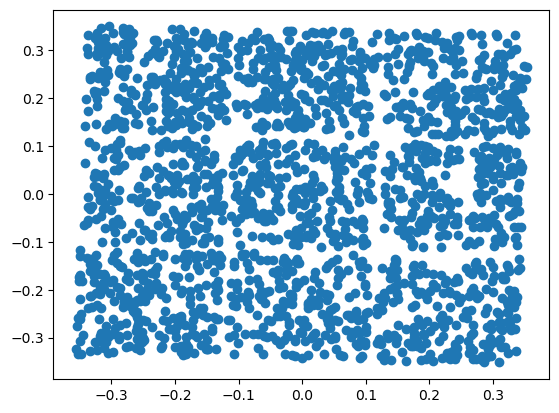

In [13]:
plt.scatter(table['oc_field_x'], table['oc_field_y'])

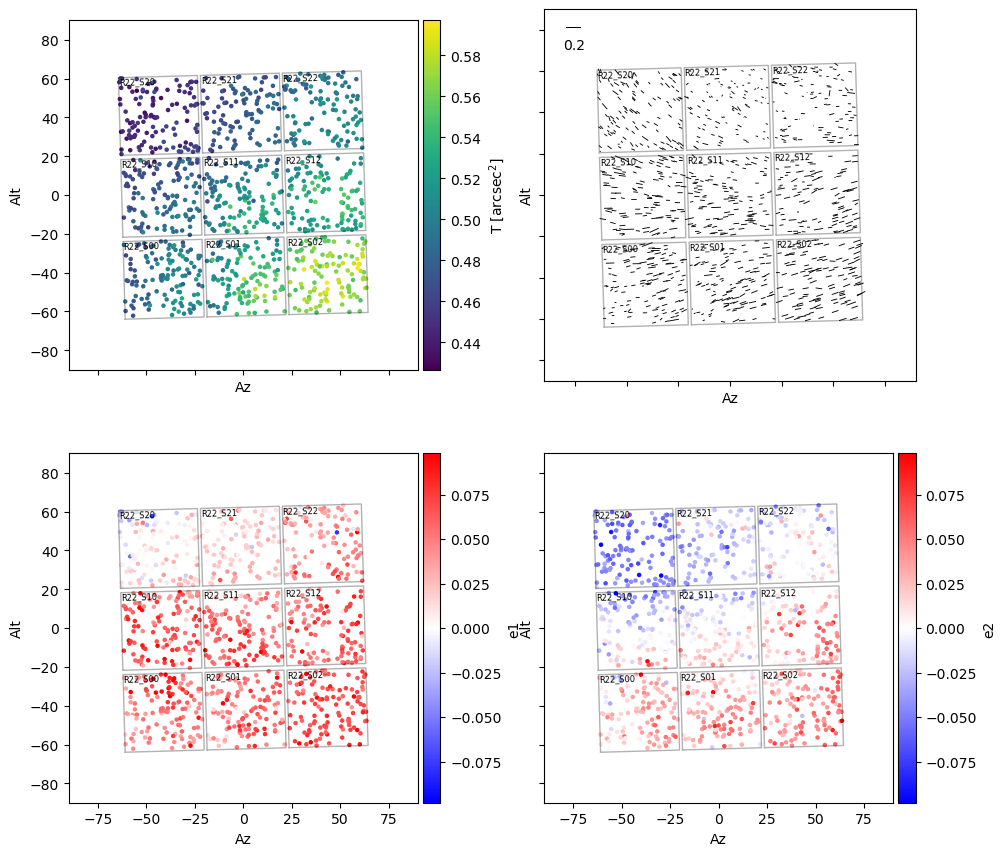

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
makeAzElPlot(fig, axes, table, camera)
plt.show()

In [21]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeFocalPlanePlot(fig, axes, table, camera)
# plt.show()

In [22]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeEquatorialPlot(fig, axes, table, camera)
# plt.show()

# Convert mm to field angle and write output file

In [23]:
from ellipticity_util import addFieldCoords_to_Table, makeOCSPlot, read_batoid_table, addOpticalCoords_to_Table
import numpy as np

In [24]:
table = addOpticalCoords_to_Table( table )

In [25]:
table = addFieldCoords_to_Table( table, camera )

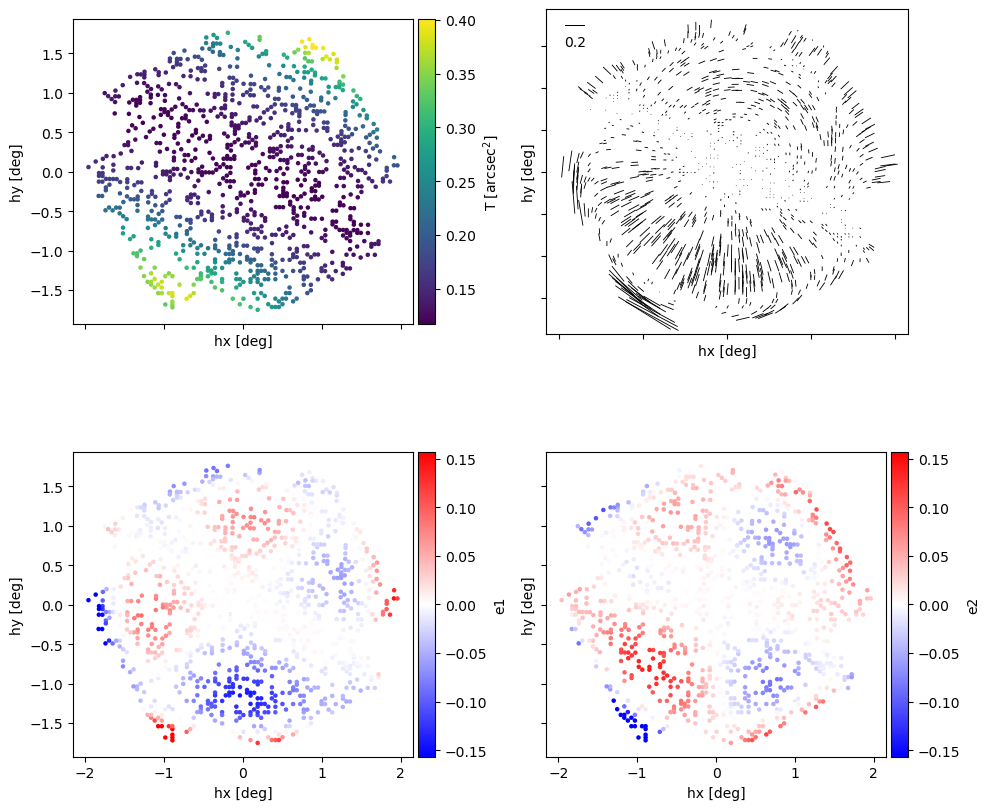

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
makeOCSPlot(fig, axes, table, camera)
plt.show()

In [33]:
from astropy.io import ascii

In [34]:
outname = folder + 'rzs/ellip_maps/imsim_seq%.8d.csv'%seqnum
outname = folder + 'imsim_seq%.8d.csv'%seqnum
# outname = '/home/r/rzanmar/coords_seq%.8d.csv'%seqnum

In [35]:
outname

'/sdf/data/rubin/shared/image_quality/imsim/imsim_seq00000182.csv'

In [36]:
ascii.write(table[ 'oc_field_x','oc_field_y','oc_Ixx','oc_Iyy','oc_Ixy', ],outname, format='csv', fast_writer=False, overwrite=True)

In [45]:
table.meta['ocRot']

array([[ 0.50193363, -0.86490614],
       [-0.86490614, -0.50193363]])

# verify mm to field [deg] conversion

In [37]:
hx, hy = table['x'] * 0.2 / 36, table['y'] * 0.2 / 36      # 0.2 arcsec / pix * pix / 10um -> 0.2/36 deg/mm

In [38]:
hx_rot, hy_rot = table['oc_x'] * 0.2 / 36, table['oc_y'] * 0.2 / 36

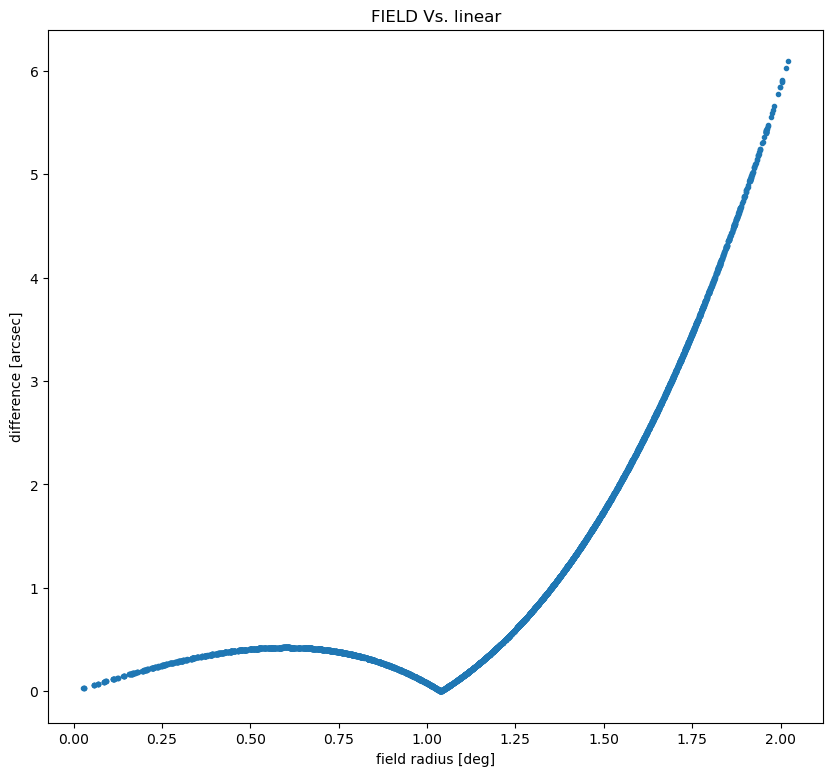

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 9), sharex=True, sharey=True)
plt.plot( np.sqrt( table['oc_field_x']**2+table['oc_field_y']**2), np.sqrt( (table['oc_field_x'] - hx_rot)**2 + (table['oc_field_y'] - hy_rot)**2)*3600, '.' )
axes.set_xlabel('field radius [deg]')
axes.set_ylabel('difference [arcsec]')
axes.set_title('FIELD Vs. linear')
plt.show()

In [40]:
table.meta['aaRot']

array([[ 0.50193363, -0.86490614],
       [ 0.86490614,  0.50193363]])

In [41]:
table.meta['ocRot']

array([[ 0.50193363, -0.86490614],
       [-0.86490614, -0.50193363]])